In [21]:
from __future__ import division
import pandas as pd
import numpy as np
import logging
import math
import time
import statistics as stats
import json
from datetime import datetime, timedelta
import os, sys
import matplotlib.pyplot as plt
import glob

#### Use VAG features For LDA and SVC ML 

In [22]:
cwd = os.getcwd()
print(cwd)
#os.chdir(cwd+'/ML')

/home/mike/Desktop/apps/research/VAG/notebooks/ML


In [23]:
feature_file_path = "features/vag_features.csv"
f_df = pd.read_csv(feature_file_path)
print(f_df.head(2))

   STATE        FD    FD_EXT    FD_FLX       VMS       VMS_EXT       VMS_FLX  \
0      1  1.714624 -1.953987 -1.893786  0.003594  7.705657e-09  5.391020e-08   
1      1  1.876535 -2.437410 -2.631023  0.017189  2.282283e-08  4.681395e-08   

            LI      LI_EXT      LI_FLX  
0   684.049676   74.933167  103.381055  
1  1746.572715  154.270082  159.203130  


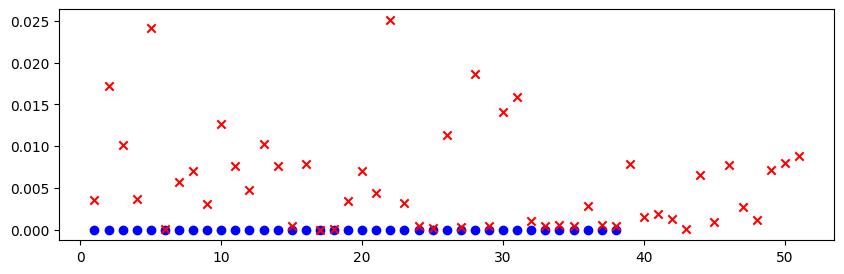

In [24]:
# Create a figure and axis
fig, ax = plt.subplots(1,1, figsize=(10, 3))

df_state_0 = f_df[f_df['STATE'] == 0]
df_state_1 = f_df[f_df['STATE'] == 1]

# Generate x-values for each state based on their positions
x_state_0 = range(1, len(df_state_0) + 1)
x_state_1 = range(1, len(df_state_1) + 1)

# Plot VMS values for state 0
ax.scatter(x_state_0, df_state_0['VMS'], color='blue', label='State 0', marker='o')

# Plot VMS values for state 1
ax.scatter(x_state_1, df_state_1['VMS'], color='red', label='State 1', marker='x')


In [25]:
#!pip install scikit-learn 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

In [36]:
features = f_df.drop('STATE', axis=1)
y = f_df['STATE']

X_train, X_test, y_train, y_test = train_test_split(features, y, shuffle=True, test_size=0.8, random_state=42)

# Initialize LDA
lda = LDA()

# Fit the model
lda.fit(X_train, y_train)

# Transform the feature
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Predict
y_pred = lda.predict(X_test)
# Predict the probabilities
y_probs = lda.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_probs)

model_results = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
        "predicted": y_pred,
        "actual": y_test.values
    }
print(f"{'Feature':<10} {'AUC':<8} {'Accuracy':<8}")
print(f"{key:<10} {model_results['auc']:<8.3f} {model_results['accuracy']:<8.3f}")


Feature    AUC      Accuracy
LI_FLX     1.000    1.000   


In [34]:
model_results = {}

for f in features.columns:
    X = f_df[[f]]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
    
    # Initialize LDA
    lda = LDA()
    
    # Fit the model
    lda.fit(X_train, y_train)
    
    # Transform the feature
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)
    
    # Predict
    y_pred = lda.predict(X_test)
    # Predict the probabilities
    y_probs = lda.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_probs)

    model_results[f] = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
        "predicted": y_pred,
        "actual": y_test.values
    }
print(f"{'Feature':<10} {'AUC':<8} {'Accuracy':<8}")
print()
for key, value in model_results.items():
    print(f"{key:<10} {value['auc']:<8.3f} {value['accuracy']:<8.3f}")

Feature    AUC      Accuracy

FD         1.000    1.000   
FD_EXT     0.426    0.481   
FD_FLX     0.512    0.519   
VMS        1.000    0.704   
VMS_EXT    0.457    0.630   
VMS_FLX    0.562    0.667   
LI         0.796    0.630   
LI_EXT     0.599    0.593   
LI_FLX     0.630    0.667   


In [20]:
svm_model_results = {}

for f in features.columns:
    X = f_df[[f]]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)
    rbf_svm.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rbf_svm.predict(X_test)
    # Predict the probabilities
    y_probs = rbf_svm.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_probs)

    svm_model_results[f] = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
    }
print(f"{'Feature':<10} {'AUC':<8} {'Accuracy':<8}")
print()
for key, value in svm_model_results.items():
    print(f"{key:<10} {value['auc']:<8.3f} {value['accuracy']:<8.3f}")

Feature    AUC      Accuracy

FD         1.000    1.000   
FD_EXT     0.535    0.467   
FD_FLX     0.545    0.500   
VMS        1.000    0.733   
VMS_EXT    0.365    0.700   
VMS_FLX    0.475    0.667   
LI         0.760    0.600   
LI_EXT     0.650    0.333   
LI_FLX     0.643    0.600   
